# 数据处理

## Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from pandas import Series, DataFrame

In [2]:
s = Series(np.random.randn(10))
s

0    1.465355
1    1.639011
2    0.563359
3    0.258848
4    1.821956
5    0.632713
6   -0.843483
7   -1.513212
8    0.347693
9    1.096110
dtype: float64

In [3]:
s[1:3],s[[1,2]],s[2]

(1    0.683877
 2   -0.256041
 dtype: float64,
 1    0.683877
 2   -0.256041
 dtype: float64,
 -0.2560405517591221)

In [3]:
s.index

RangeIndex(start=0, stop=10, step=1)

In [4]:
s1 = s.copy()
s1.index = ["item 0", "item 1", "item 2", "item 3", "item 4", "item 5", "item 6", "item 7", "item 8", "item 9"]
s1

item 0    1.465355
item 1    1.639011
item 2    0.563359
item 3    0.258848
item 4    1.821956
item 5    0.632713
item 6   -0.843483
item 7   -1.513212
item 8    0.347693
item 9    1.096110
dtype: float64

In [6]:
s2 = Series(s.values[::-1], index=["item 0", "item 1", "item 2", "item 3", "item 4", "item 5", "item 6", "item 7", "item 8", "item 9"])
s2

item 0    1.186220
item 1    0.065539
item 2    0.012003
item 3    0.091335
item 4   -0.645392
item 5    1.481351
item 6   -0.848179
item 7   -0.346374
item 8    1.269409
item 9    1.660869
dtype: float64

In [5]:
s1 + s2

NameError: name 's2' is not defined

In [ ]:
s3 = pd.Series(["d", "e"])
s4 = pd.Series(["f", "g"])
s5 = pd.concat([s2, s3])
s5

In [10]:
s5[1]

'e'

### ❓Q1. 我们如何将 `s3` 和 `s4` 和合并在一起，同时保证 `index` 是递增的呢？

In [ ]:
s4.index = ['2', '3']
s6 = pd.concat([s3, s4])
s6

## Dataframe

In [6]:
df1 = DataFrame([[1,2,3,4,5], [6,7,8,9,10]], columns=["a", "b", "c", "d", "e"])
df1

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10


In [9]:
gplay = pd.read_csv("googleplaystore.csv")
gplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


### ❓Q2. 试去除 `gplay` 中的 `Nan` 数据

In [10]:
gplay.dropna(inplace=True)
gplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


### ❓Q3. 查看`gplay`中重复的列，试使用`iloc`和`loc`来选中重复的行，并谈谈他们的区别

In [11]:
duplicated_apps = gplay.loc[gplay.duplicated()]

print(gplay.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 9361, dtype: bool


In [8]:
print(len(duplicated_apps))

474


In [9]:
duplicated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,31-Jul-18,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,24-Jul-18,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,20-Jul-18,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,16-Jul-18,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,6-Apr-18,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,6-Aug-18,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,27-Jun-18,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,1-Jun-18,0.6.88,5.0 and up


In [1]:
#duplicated_apps.loc[0]  报错,因为没有标签为‘0’的行

In [12]:
first_dup_app_iloc = duplicated_apps.iloc[0]
first_dup_app_iloc

App               Quick PDF Scanner + OCR FREE
Category                              BUSINESS
Rating                                     4.2
Reviews                                  80805
Size                        Varies with device
Installs                            5,000,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                                Business
Last Updated                         26-Feb-18
Current Ver                 Varies with device
Android Ver                       4.0.3 and up
Name: 229, dtype: object

#### ''' Your Understanding Here '''

In [2]:
#loc根据索引查找，iloc根据序号查找

In [8]:
print(gplay.shape)
print(gplay.drop_duplicates().shape)

(10841, 13)
(10358, 13)


## 读取数据

In [13]:
df = pd.read_csv("Auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [14]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [15]:
df = df.replace('?', pd.NA)  
  
df['origin'] = df['origin'].astype('object')  
df['year'] = df['year'].astype('object')  
  
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year             object
origin           object
name             object
dtype: object


In [16]:
df.isna().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
392    False
393    False
394    False
395    False
396    False
Length: 397, dtype: bool

In [46]:
df[df.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


### ❓Q5. 将 `df` 中的所有含有 `Nan` 的行全部移除

In [47]:
df = df[~df.isnull().any(axis=1)]
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [60]:
X = df["horsepower"]
y = df["mpg"]
X = sm.add_constant(X)
model1 = sm.OLS(y,X.astype(float)).fit()

#### ❓Q6. 了解 `matplotlib`，试对上述的代码的预测结果进行可视化处理

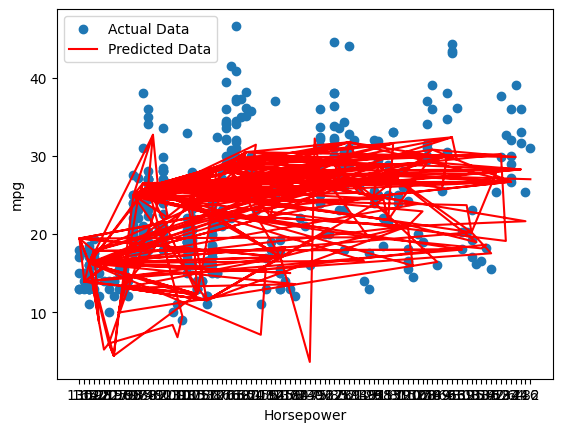

In [73]:
plt.scatter(df["horsepower"], df["mpg"], label='Actual Data')  
X = X.astype(float)
predicted_y = model1.predict(X)  

plt.plot(df["horsepower"], predicted_y, color='red', label='Predicted Data')  
  
plt.xlabel('Horsepower')  
plt.ylabel('mpg')    

plt.legend()
plt.show()


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [85]:
df = pd.read_csv("email_spam.csv")
df

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,no,yes,no,no,no,no,no,no,no,no,1137,202,HTML,no,no,no,0,big
1,0,no,yes,no,no,no,no,no,no,no,no,10504,202,HTML,no,no,no,1,small
2,0,no,yes,no,no,no,no,yes,no,yes,no,7773,192,HTML,no,no,no,6,small
3,0,no,yes,no,no,no,no,no,no,no,no,13256,255,HTML,no,no,no,48,small
4,0,no,yes,no,no,no,no,no,no,no,yes,1231,29,Plain,no,no,no,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,no,yes,no,no,no,no,no,no,no,no,332,12,Plain,no,no,no,0,small
3917,1,no,yes,no,no,no,no,yes,no,no,no,323,15,Plain,no,no,no,0,small
3918,0,yes,yes,no,no,no,no,no,no,no,no,8656,208,HTML,no,no,no,5,small
3919,0,yes,yes,no,no,no,no,no,no,no,no,10185,132,Plain,no,no,no,0,small


#### ❓Q7. 现在我们将考虑对垃圾邮件进行分类。但在生成模型之前，首先将所有列数据转换为数字。具体地说:
- `no` 修改为 `0`，`yes` 修改为 `1`
- 为 `format` 和 `number` 使用虚拟变量编码(你可以使用 `pd.get_dummies()` 来生成虚拟变量)

In [86]:
df = df.replace({'no': 0, 'yes': 1})  

df = pd.get_dummies(df, columns=['format', 'number'])  
 
X = df.iloc[:,1:] 
y = df["spam"]  
df

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,...,line_breaks,re_subj,exclaim_subj,urgent_subj,exclaim_mess,format_HTML,format_Plain,number_big,number_none,number_small
0,0,0,1,0,0,0,0,0,0,0,...,202,0,0,0,0,True,False,True,False,False
1,0,0,1,0,0,0,0,0,0,0,...,202,0,0,0,1,True,False,False,False,True
2,0,0,1,0,0,0,0,1,0,1,...,192,0,0,0,6,True,False,False,False,True
3,0,0,1,0,0,0,0,0,0,0,...,255,0,0,0,48,True,False,False,False,True
4,0,0,1,0,0,0,0,0,0,0,...,29,0,0,0,1,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,0,1,0,0,0,0,0,0,0,...,12,0,0,0,0,False,True,False,False,True
3917,1,0,1,0,0,0,0,1,0,0,...,15,0,0,0,0,False,True,False,False,True
3918,0,1,1,0,0,0,0,0,0,0,...,208,0,0,0,5,True,False,False,False,True
3919,0,1,1,0,0,0,0,0,0,0,...,132,0,0,0,0,False,True,False,False,True


#### ❓Q8. 使用 `train_test_split()` 将数据集划分为`70%`的训练集和`30%`的测试集(设置 `random_test=123` 以确保我们可以复制分割)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### ❓Q9. 使用逻辑回归的模型来进行预测，同时看看你的准确率如何

In [93]:
model = LogisticRegression(max_iter=100000)  
   
model.fit(X_train, y_train)  
  
y_pred = model.predict(X_test)  
  
y_pred_score = accuracy_score(y_test, y_pred)  
  
print("Test Accuracy: ", y_pred_score)

Test Accuracy:  0.9107901444350043


#### ❓Q10. 由于数据是不平衡的，最好生成混淆矩阵。了解什么是混淆矩阵以及如何在sklearn上实现它

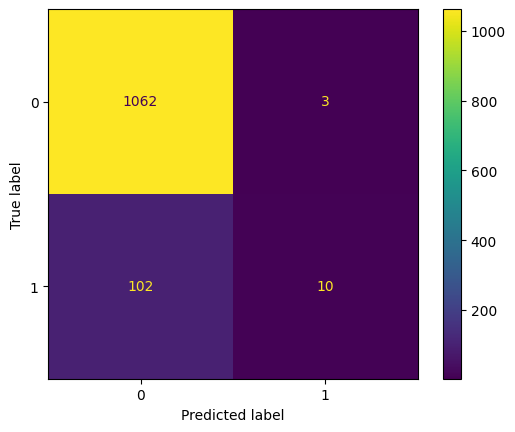

In [94]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()